In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [3]:
# Check if folder tickers exists

# Define the folder name
folder_name = '../tickers'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../tickers' folder already exists.


In [4]:
# Webscrapping Wikipedia table to get the SP500 components
page = requests.get("https://en.wikipedia.org/wiki/Swiss_Market_Index")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [5]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Rank,Name,Industry,Ticker,Canton,Weighting in %
0,1,Nestlé SA,Food,NESN.SW,Vaud,19[1]
1,2,Roche Holding AG,Pharmacy,ROG.SW,Basel,17[1]
2,3,Novartis International AG,Pharmacy,NOVN.SW,Basel,17[1]
3,4,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW,Geneva,7[1]
4,5,Zurich Insurance Group AG,Insurance,ZURN.SW,Zurich,6[1]
5,6,UBS Group AG,Banks,UBSG.SW,Zurich/Basel,5[1]
6,7,ABB Ltd,Electrical equipment,ABBN.SW,Zurich,4[1]
7,8,Lonza Group AG,Chemistry,LONN.SW,Basel,4[1]
8,9,Sika AG,Chemistry,SIKA.SW,Zug,3[1]
9,10,Alcon Inc,Pharmacy,ALC.SW,Fribourg,3[1]


In [6]:
wiki.rename(columns={'Industry':'Sector'}, inplace=True)

In [7]:
# Add index row values
new_row = {'Name': 'SMI', 'Sector': 'Index', 'Ticker': '^SSMI'}

# Convert the new row to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Append the new row to the DataFrame
wiki = pd.concat([wiki[['Name','Sector','Ticker']], new_row_df], ignore_index=True)
wiki.head(21)

,Name,Sector,Ticker
0,Nestlé SA,Food,NESN.SW
1,Roche Holding AG,Pharmacy,ROG.SW
2,Novartis International AG,Pharmacy,NOVN.SW
3,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW
4,Zurich Insurance Group AG,Insurance,ZURN.SW
5,UBS Group AG,Banks,UBSG.SW
6,ABB Ltd,Electrical equipment,ABBN.SW
7,Lonza Group AG,Chemistry,LONN.SW
8,Sika AG,Chemistry,SIKA.SW
9,Alcon Inc,Pharmacy,ALC.SW


In [8]:
# Get the data for the stock
index_list = wiki['Ticker'].tolist()

In [9]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [10]:
# Get the name of the notebook
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__'])
notebook_name = notebook_name.split('-')[0]

In [11]:
# Save all the tickers data
wiki[['Name','Sector','Ticker']].to_csv(f"../tickers/{notebook_name}.csv",index=True)

In [12]:
# Configuration of different parameters of the notebook
ticker = '^SSMI'
year = '2025'

In [13]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
1990-11-09,1387.099976,1387.099976,0.0,1389.000000,1375.300049,1378.900024,0.0,0
1990-11-12,1407.500000,1407.500000,0.0,1408.099976,1388.099976,1388.099976,0.0,0
1990-11-13,1415.199951,1415.199951,0.0,1429.400024,1411.400024,1412.199951,0.0,0
1990-11-14,1410.300049,1410.300049,0.0,1413.599976,1402.099976,1413.599976,0.0,0
1990-11-15,1405.699951,1405.699951,0.0,1416.699951,1405.099976,1410.599976,0.0,0
1990-11-16,1395.199951,1395.199951,0.0,1407.400024,1389.400024,1405.699951,0.0,0
1990-11-19,1416.000000,1416.000000,0.0,1417.900024,1395.599976,1395.599976,0.0,0
1990-11-20,1405.800049,1405.800049,0.0,1415.000000,1404.699951,1414.800049,0.0,0
1990-11-21,1398.400024,1398.400024,0.0,1405.599976,1396.699951,1405.599976,0.0,0


In [14]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-03-07,13076.679688,13076.679688,0.0,13110.559570,12889.549805,12953.209961,0.0,35602700
2025-03-10,13013.450195,13013.450195,0.0,13111.290039,12984.080078,13111.049805,0.0,34263500
2025-03-11,12692.250000,12692.250000,0.0,12965.179688,12668.209961,12959.370117,0.0,33451500
2025-03-12,12868.429688,12868.429688,0.0,12977.759766,12790.870117,12792.929688,0.0,29658600
2025-03-13,12836.190430,12836.190430,0.0,12927.709961,12790.120117,12827.160156,0.0,24525400
2025-03-14,12916.809570,12916.809570,0.0,12948.269531,12784.240234,12827.370117,0.0,28134200
2025-03-17,13058.120117,13058.120117,0.0,13064.980469,12917.929688,12927.509766,0.0,23841800
2025-03-18,13062.110352,13062.110352,0.0,13117.349609,13022.320312,13095.250000,0.0,26781000
2025-03-19,13040.919922,13040.919922,0.0,13071.530273,12996.179688,13022.280273,0.0,27524000


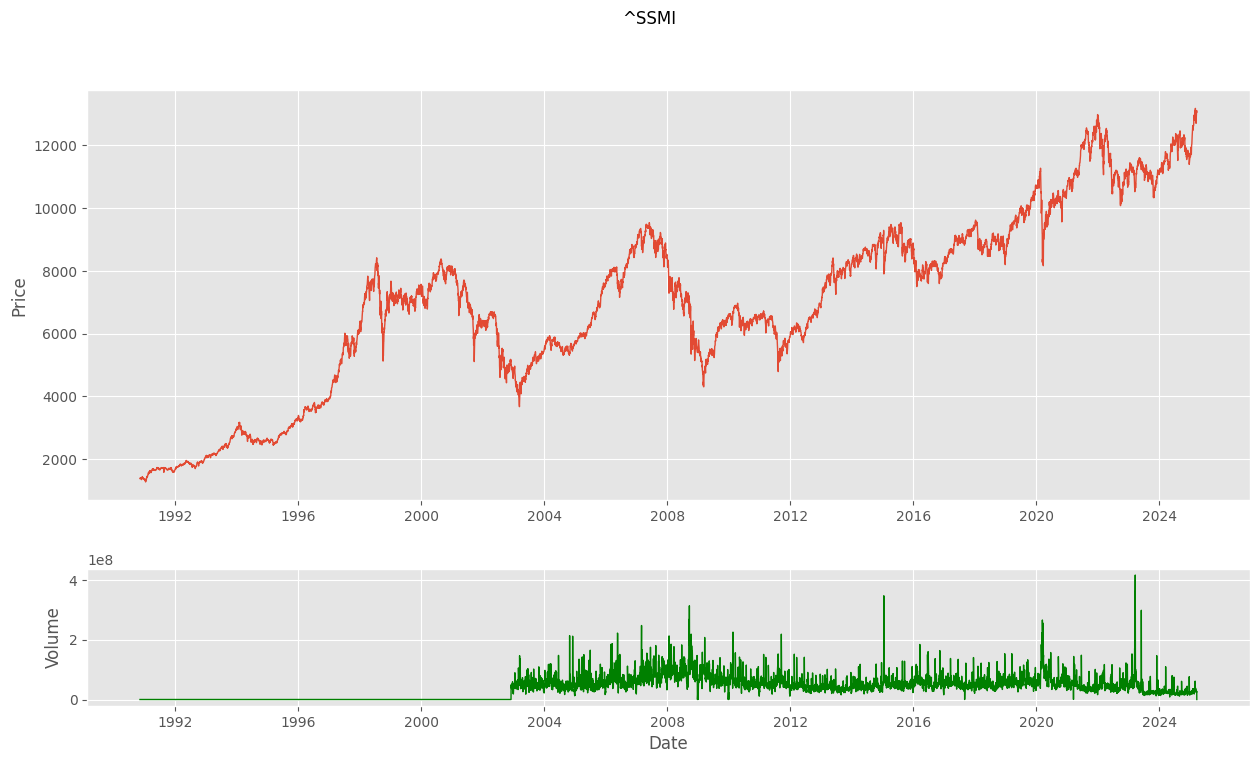

In [15]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [16]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [17]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
1990,1383.099976,NaN
1991,1670.099976,20.750488
1992,2107.000000,26.160112
1993,2957.600098,40.370199
1994,2628.800049,-11.117123
1995,3297.699951,25.445066
1996,3942.199951,19.543925
1997,6265.500000,58.934100
1998,7160.700195,14.287769


In [18]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [19]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

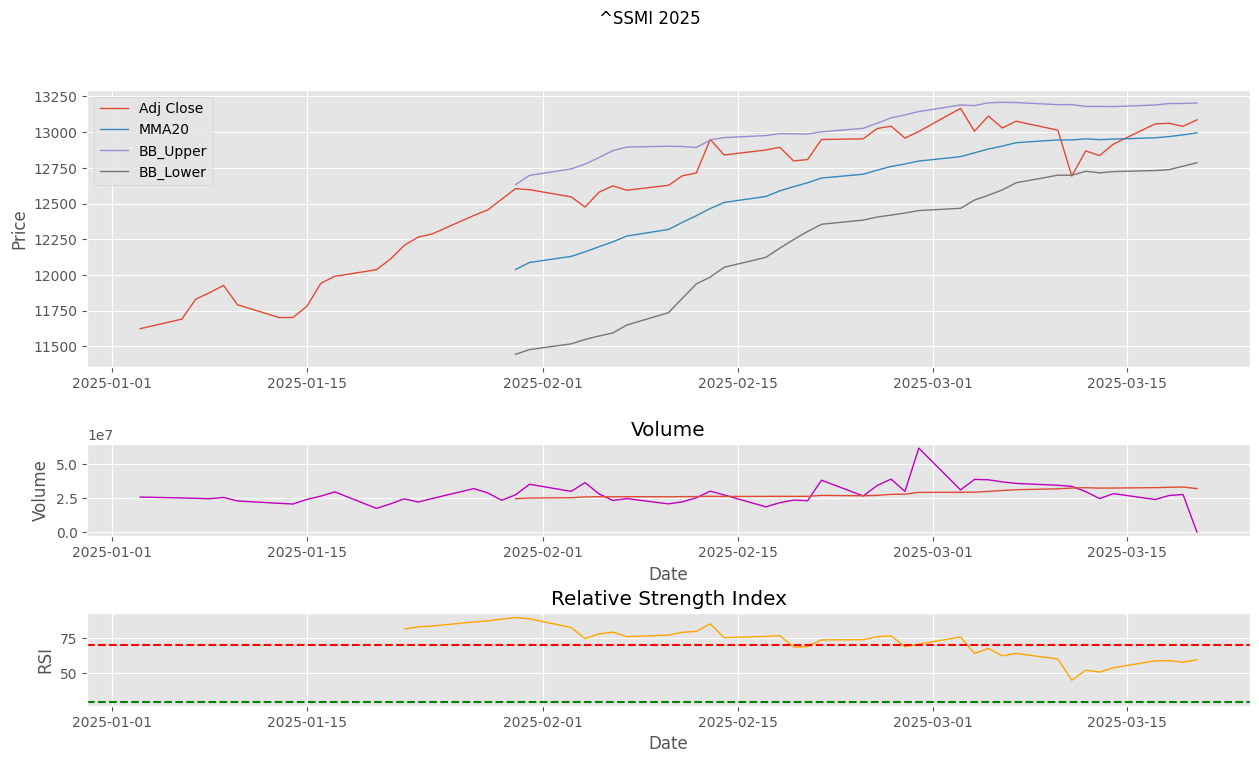

In [20]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [21]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [22]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-03-07,13076.679688,13076.679688,0.0,13110.559570,12889.549805,12953.209961,0.0,35602700,2025,12926.241943,13206.921596,12645.562291,63.992933,0.362949
2025-03-10,13013.450195,13013.450195,0.0,13111.290039,12984.080078,13111.049805,0.0,34263500,2025,12945.522461,13192.517212,12698.527710,60.077468,-0.483529
2025-03-11,12692.250000,12692.250000,0.0,12965.179688,12668.209961,12959.370117,0.0,33451500,2025,12945.426953,13192.811586,12698.042320,45.011018,-2.468217
2025-03-12,12868.429688,12868.429688,0.0,12977.759766,12790.870117,12792.929688,0.0,29658600,2025,12953.153418,13179.924601,12726.382234,52.105913,1.388089
2025-03-13,12836.190430,12836.190430,0.0,12927.709961,12790.120117,12827.160156,0.0,24525400,2025,12947.509961,13179.954560,12715.065362,50.813900,-0.250530
2025-03-14,12916.809570,12916.809570,0.0,12948.269531,12784.240234,12827.370117,0.0,28134200,2025,12951.356934,13179.046482,12723.667386,53.892738,0.628061
2025-03-17,13058.120117,13058.120117,0.0,13064.980469,12917.929688,12927.509766,0.0,23841800,2025,12960.508936,13189.907143,12731.110728,58.765009,1.094005
2025-03-18,13062.110352,13062.110352,0.0,13117.349609,13022.320312,13095.250000,0.0,26781000,2025,12968.915430,13200.259812,12737.571048,58.897091,0.030557
2025-03-19,13040.919922,13040.919922,0.0,13071.530273,12996.179688,13022.280273,0.0,27524000,2025,12981.035449,13200.495287,12761.575611,57.837561,-0.162228


  0%|          | 0/21 [00:00<?, ?it/s]

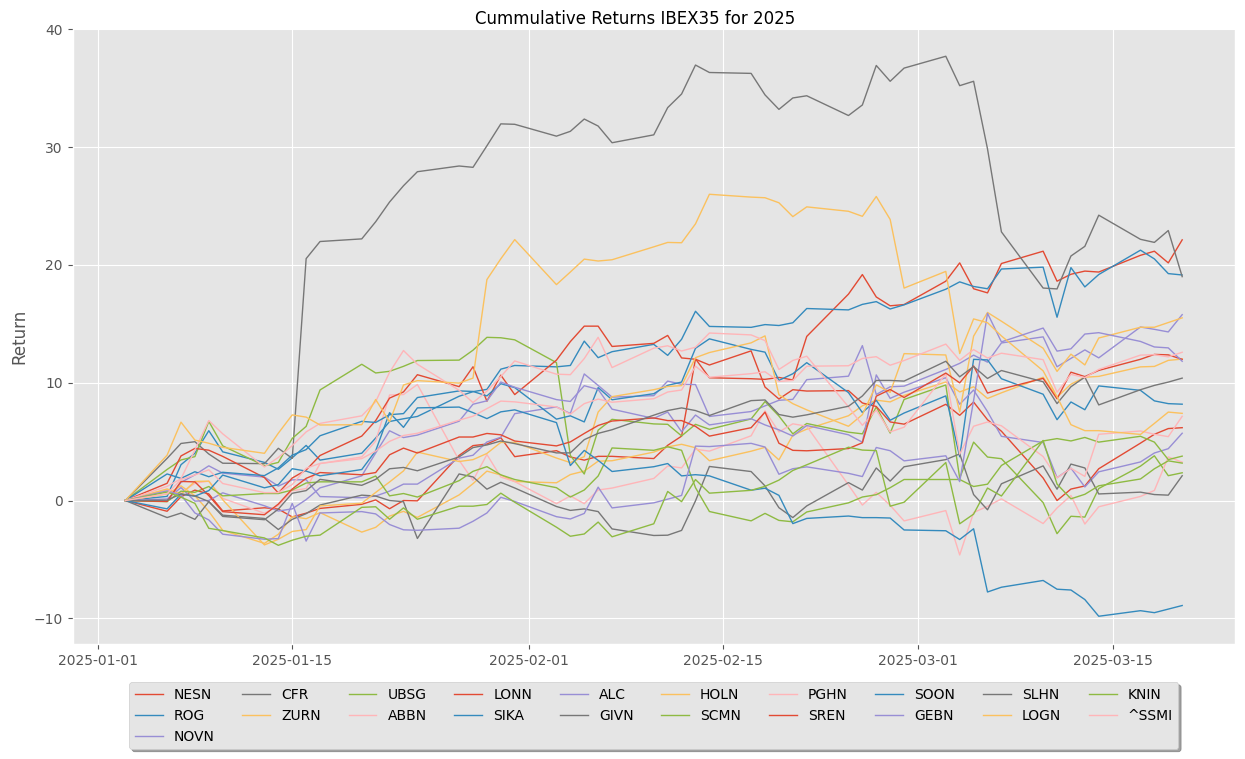

In [23]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [24]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [25]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,NESN.SW,Nestlé SA,2025-03-20,22.115134
1,ROG.SW,Roche Holding AG,2025-03-20,19.134842
2,CFR.SW,Compagnie Financière Richemont SA,2025-03-20,18.994413
3,NOVN.SW,Novartis International AG,2025-03-20,15.769413
4,HOLN.SW,Holcim Limited,2025-03-20,15.498737
5,^SSMI,SMI,2025-03-20,12.578010
6,ZURN.SW,Zurich Insurance Group AG,2025-03-20,12.000004
7,SREN.SW,Swiss Reinsurance Company Ltd,2025-03-20,11.981921
8,GEBN.SW,Geberit AG,2025-03-20,11.815329
9,SLHN.SW,Swiss Life Holding AG,2025-03-20,10.384508


In [26]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,NESN.SW,Nestlé SA,2025-03-20,22.115134
1,ROG.SW,Roche Holding AG,2025-03-20,19.134842
2,CFR.SW,Compagnie Financière Richemont SA,2025-03-20,18.994413
3,NOVN.SW,Novartis International AG,2025-03-20,15.769413
4,HOLN.SW,Holcim Limited,2025-03-20,15.498737
5,^SSMI,SMI,2025-03-20,12.578010
6,ZURN.SW,Zurich Insurance Group AG,2025-03-20,12.000004
7,SREN.SW,Swiss Reinsurance Company Ltd,2025-03-20,11.981921
8,GEBN.SW,Geberit AG,2025-03-20,11.815329
9,SLHN.SW,Swiss Life Holding AG,2025-03-20,10.384508


In [27]:
# Create also table of daily returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Daily_Return'] = daily_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Daily_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Daily_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Daily_Return'],ignore_index=True, ascending=False)

  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Daily_Return
0,GIVN.SW,Givaudan SA,2025-03-20,1.640172
1,PGHN.SW,Partners Group Holding AG,2025-03-20,1.637471
2,NESN.SW,Nestlé SA,2025-03-20,1.626559
3,NOVN.SW,Novartis International AG,2025-03-20,1.282575
4,ALC.SW,Alcon Inc,2025-03-20,1.254076
5,HOLN.SW,Holcim Limited,2025-03-20,0.347049
6,^SSMI,SMI,2025-03-20,0.346371
7,SOON.SW,Sonova,2025-03-20,0.334446
8,SLHN.SW,Swiss Life Holding AG,2025-03-20,0.306040
9,SCMN.SW,Swisscom AG,2025-03-20,0.287356
